<a href="https://colab.research.google.com/github/Geralberrio/Proyecto_Analitica/blob/master/Hospitalizacion_clasificacion_RF_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación con Random Forest y Gradient Boosting


In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

In [6]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=42

# Preprocesamiento de datos

In [7]:
# Carguemos los datos:
data_train = pd.read_csv('./Hospitalizacion_train_data.csv', header=0)
data_train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62508,62509,28,b,11,X,3,gynecology,R,F,3.0,58215,8.0,Emergency,Moderate,6,51-60,5071.0,11-20
62509,62510,32,f,9,Y,2,gynecology,S,B,3.0,58215,8.0,Trauma,Moderate,2,51-60,4963.0,11-20
62510,62511,11,b,2,Y,2,TB & Chest disease,Q,D,4.0,58215,8.0,Trauma,Moderate,2,51-60,7904.0,11-20
62511,62512,29,a,4,X,2,gynecology,S,F,2.0,74947,2.0,Trauma,Moderate,4,61-70,5627.0,51-60


In [8]:
# datos de prueba, estos datos no tienen la variable objetivo porque la idea es medir como funciona el modelo para estos casos nuevos
data_test = pd.read_csv('./Hospitalizacion_test_data.csv', header=0)
data_test

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3.0,Z,3.0,gynecology,S,A,2.0,17006.0,2.0,Emergency,Moderate,2.0,71-80,3095.0
1,318440,29,a,4.0,X,2.0,gynecology,S,F,2.0,17006.0,2.0,Trauma,Moderate,4.0,71-80,4018.0
2,318441,26,b,2.0,Y,3.0,gynecology,Q,D,4.0,17006.0,2.0,Emergency,Moderate,3.0,71-80,4492.0
3,318442,6,a,6.0,X,3.0,gynecology,Q,F,2.0,17006.0,2.0,Trauma,Moderate,3.0,71-80,4173.0
4,318443,28,b,11.0,X,2.0,gynecology,R,F,2.0,17006.0,2.0,Trauma,Moderate,4.0,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66501,384940,19,a,7.0,Y,3.0,gynecology,S,C,1.0,96585.0,8.0,Emergency,Moderate,4.0,51-60,3764.0
66502,384941,27,a,7.0,Y,3.0,gynecology,R,C,2.0,96585.0,8.0,Trauma,Moderate,2.0,51-60,5101.0
66503,384942,26,b,2.0,Y,2.0,gynecology,S,D,3.0,96585.0,8.0,Trauma,Moderate,2.0,51-60,5928.0
66504,384943,19,a,7.0,Y,2.0,gynecology,S,C,1.0,96585.0,8.0,Emergency,Moderate,2.0,51-60,5057.0


In [9]:
# Veamos la descripción del dataset:
data_train.describe(include='all')

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,62513.000000,62513.000000,62513,62513.000000,62513,62513.000000,62513,62513,62513,62502.000000,62513.000000,61913.000000,62513,62513,62513.000000,62512,62512.000000,62512
unique,NaN,NaN,7,NaN,3,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,31-40,NaN,21-30
freq,NaN,NaN,27847,NaN,25846,NaN,47621,25508,21646,NaN,NaN,NaN,33089,36143,NaN,12606,NaN,18294
mean,31257.000000,18.804841,NaN,4.798538,NaN,3.126822,NaN,NaN,NaN,2.656139,66162.622942,6.971282,NaN,NaN,3.234271,NaN,4953.568579,NaN
std,18046.093026,8.594200,NaN,3.121835,NaN,1.143167,NaN,NaN,NaN,0.860855,37954.081997,4.331270,NaN,NaN,1.745474,NaN,1050.869149,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,21.000000,1.000000,NaN,NaN,0.000000,NaN,1813.000000,NaN
25%,15629.000000,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,33340.000000,4.000000,NaN,NaN,2.000000,NaN,4281.000000,NaN
50%,31257.000000,21.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,66700.000000,8.000000,NaN,NaN,3.000000,NaN,4830.000000,NaN
75%,46885.000000,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,98826.000000,8.000000,NaN,NaN,4.000000,NaN,5470.000000,NaN


In [10]:
# Veamos la descripción del dataset test:
data_test.describe(include='all')

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
count,66506.000000,66506.000000,66506,66505.000000,66505,66505.000000,66505,66505,66505,66488.000000,66505.000000,65615.000000,66505,66505,66505.000000,66505,66505.000000
unique,NaN,NaN,7,NaN,3,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN
top,NaN,NaN,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN
freq,NaN,NaN,29887,NaN,27852,NaN,51463,27037,23641,NaN,NaN,NaN,33717,37964,NaN,13799,NaN
mean,351691.500000,18.677653,NaN,4.799624,NaN,3.148079,NaN,NaN,NaN,2.628264,65563.810706,6.909289,NaN,NaN,3.299812,NaN,4897.509180
std,19198.772838,8.634988,NaN,3.100457,NaN,1.133207,NaN,NaN,NaN,0.871970,37824.846468,4.407809,NaN,NaN,1.809091,NaN,1058.548675
min,318439.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,8.000000,1.000000,NaN,NaN,0.000000,NaN,1806.000000
25%,335065.250000,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,32849.000000,4.000000,NaN,NaN,2.000000,NaN,4218.000000
50%,351691.500000,19.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,64892.000000,8.000000,NaN,NaN,3.000000,NaN,4761.000000
75%,368317.750000,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,98122.000000,8.000000,NaN,NaN,4.000000,NaN,5416.000000


In [11]:
# Verifiquemos si hay datos faltantes:
data_train.isna().sum()

case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                             11
patientid                              0
City_Code_Patient                    600
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    1
Admission_Deposit                      1
Stay                                   1
dtype: int64

In [12]:
data_test.isna().sum()

case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     1
Hospital_region_code                   1
Available Extra Rooms in Hospital      1
Department                             1
Ward_Type                              1
Ward_Facility_Code                     1
Bed Grade                             18
patientid                              1
City_Code_Patient                    891
Type of Admission                      1
Severity of Illness                    1
Visitors with Patient                  1
Age                                    1
Admission_Deposit                      1
dtype: int64

In [13]:
# Se elimina las columnas de codigo del pacientes, id del caso y numero de visitantes debido a que no agregan valor al modelo.
data_train.drop(columns=['City_Code_Patient','Visitors with Patient','case_id'],inplace=True)

In [14]:
data_test.drop(columns=['City_Code_Patient','Visitors with Patient','case_id'],inplace=True)

In [15]:
# Eliminemos los registros de bed grade que esten vacios
data_train.dropna(inplace=True)

In [16]:
data_test.dropna(inplace=True)

In [17]:
#Comprobamos que no hay más datos nulos
data_train.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
Type of Admission                    0
Severity of Illness                  0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [18]:
data_test.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
Type of Admission                    0
Severity of Illness                  0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [19]:
#Se aplica ordinal enconding a las caracteristica de la lista
# pues usaremos modelos basados en arboles de decisión
columnas = ['Department', 'Stay','Type of Admission','Severity of Illness','Ward_Type','Ward_Facility_Code','Hospital_type_code','Hospital_region_code','Hospital_code',	'City_Code_Hospital','Bed Grade','Age']
for col in columnas:
  print(col)
  print({i: cat for i, cat in enumerate(data_train[col].astype('category').cat.categories)})
  print('')
  data_train.loc[:, col]= data_train[col].astype('category').cat.codes

Department
{0: 'TB & Chest disease', 1: 'anesthesia', 2: 'gynecology', 3: 'radiotherapy', 4: 'surgery'}

Stay
{0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'}

Type of Admission
{0: 'Emergency', 1: 'Trauma', 2: 'Urgent'}

Severity of Illness
{0: 'Extreme', 1: 'Minor', 2: 'Moderate'}

Ward_Type
{0: 'P', 1: 'Q', 2: 'R', 3: 'S', 4: 'T', 5: 'U'}

Ward_Facility_Code
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}

Hospital_type_code
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g'}

Hospital_region_code
{0: 'X', 1: 'Y', 2: 'Z'}

Hospital_code
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32}

City_Code_Hospital
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 9, 8: 10, 9: 11, 10: 13}

Bed Grade
{0: 1.0, 1

In [20]:
data_train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Admission_Deposit,Stay
0,7,2,2,2,3,3,2,5,1,31397,0,0,5,4911.0,0
1,1,2,4,2,2,3,3,5,1,31397,1,0,5,5954.0,4
2,9,4,0,0,2,1,3,4,1,31397,1,0,5,4745.0,3
3,25,1,1,1,2,3,2,3,1,31397,1,0,5,7272.0,4
4,25,1,1,1,2,3,3,3,1,31397,1,0,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62507,25,1,1,1,2,2,2,3,1,76513,0,2,6,4726.0,5
62508,27,1,9,0,3,2,2,5,2,58215,0,2,5,5071.0,1
62509,31,5,7,1,2,2,3,1,2,58215,1,2,5,4963.0,1
62510,10,1,1,1,2,0,1,3,3,58215,1,2,5,7904.0,1


In [21]:
#Se aplica ordinal enconding a las caracteristica de la lista
# pues usaremos modelos basados en arboles de decisión
columnas = ['Department', 'Type of Admission','Severity of Illness','Ward_Type','Ward_Facility_Code','Hospital_type_code','Hospital_region_code','Hospital_code',	'City_Code_Hospital','Bed Grade','Age']
for col in columnas:
  print(col)
  print({i: cat for i, cat in enumerate(data_test[col].astype('category').cat.categories)})
  print('')
  data_test.loc[:, col]= data_test[col].astype('category').cat.codes

Department
{0: 'TB & Chest disease', 1: 'anesthesia', 2: 'gynecology', 3: 'radiotherapy', 4: 'surgery'}

Type of Admission
{0: 'Emergency', 1: 'Trauma', 2: 'Urgent'}

Severity of Illness
{0: 'Extreme', 1: 'Minor', 2: 'Moderate'}

Ward_Type
{0: 'P', 1: 'Q', 2: 'R', 3: 'S', 4: 'T', 5: 'U'}

Ward_Facility_Code
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}

Hospital_type_code
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g'}

Hospital_region_code
{0: 'X', 1: 'Y', 2: 'Z'}

Hospital_code
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32}

City_Code_Hospital
{0: 1.0, 1: 2.0, 2: 3.0, 3: 4.0, 4: 5.0, 5: 6.0, 6: 7.0, 7: 9.0, 8: 10.0, 9: 11.0, 10: 13.0}

Bed Grade
{0: 1.0, 1: 2.0, 2: 3.0, 3: 4.0}

Age
{0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-

In [22]:
data_test

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Admission_Deposit
0,20,2,2,2,3.0,2,3,0,1,17006.0,0,2,7,3095.0
1,28,0,3,0,2.0,2,3,5,1,17006.0,1,2,7,4018.0
2,25,1,1,1,3.0,2,1,3,3,17006.0,0,2,7,4492.0
3,5,0,5,0,3.0,2,1,5,1,17006.0,1,2,7,4173.0
4,27,1,9,0,2.0,2,2,5,1,17006.0,1,2,7,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66500,8,3,4,2,3.0,3,3,5,3,58275.0,1,1,4,3194.0
66501,18,0,6,1,3.0,2,3,2,0,96585.0,0,2,5,3764.0
66502,26,0,6,1,3.0,2,2,2,1,96585.0,1,2,5,5101.0
66503,25,1,1,1,2.0,2,3,3,2,96585.0,1,2,5,5928.0


In [23]:
#se convierte la columna admission deposit en un entero
data_train['Admission_Deposit'] = data_train['Admission_Deposit'].astype('int')

In [24]:
#se convierte la columna admission deposit en un entero del conjunto de test.
data_test['Admission_Deposit'] = data_test['Admission_Deposit'].astype('int')

In [25]:
#dataset final
data_train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Admission_Deposit,Stay
0,7,2,2,2,3,3,2,5,1,31397,0,0,5,4911,0
1,1,2,4,2,2,3,3,5,1,31397,1,0,5,5954,4
2,9,4,0,0,2,1,3,4,1,31397,1,0,5,4745,3
3,25,1,1,1,2,3,2,3,1,31397,1,0,5,7272,4
4,25,1,1,1,2,3,3,3,1,31397,1,0,5,5558,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62507,25,1,1,1,2,2,2,3,1,76513,0,2,6,4726,5
62508,27,1,9,0,3,2,2,5,2,58215,0,2,5,5071,1
62509,31,5,7,1,2,2,3,1,2,58215,1,2,5,4963,1
62510,10,1,1,1,2,0,1,3,3,58215,1,2,5,7904,1


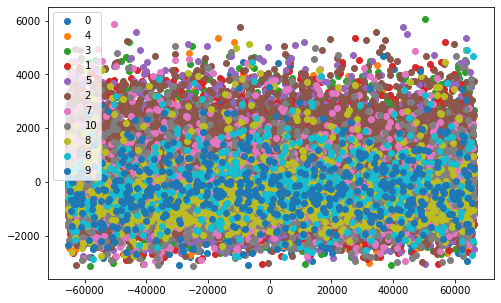

In [26]:
#visualizar los datos reducidos en dos dimensiones
data_train.reset_index(drop=True,inplace=True)

pca = PCA(2)
z = pca.fit_transform(data_train.drop(columns='Stay'))

fig, ax = plt.subplots()
for label in data_train['Stay'].unique():
    ax.scatter(
        z[data_train[data_train['Stay']==label].index,0],
        z[data_train[data_train['Stay']==label].index,1],
        label=label
    )

ax.legend()
fig.set_size_inches(1.6*5,5)

#Clasificación

In [27]:
#separar los datos en conjuntos de entrenamiento (70%), validación(15%) y prueba (15%) 
#que se obtendran del data_train debido a que en el data_test no tenemos la variable Stay

X_train, X_test, y_train, y_test = train_test_split(
    data_train.drop(columns='Stay'),
    data_train['Stay'],
    test_size=0.3,
    stratify=data_train['Stay'],
    random_state=random_state
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test,
    y_test,
    test_size=0.5,
    stratify=y_test,
    random_state=random_state
)

In [28]:
# Defineamos los modelos base (un random forest y un gradient boosting):
rf_base = RandomForestClassifier(random_state=random_state)
gb_base = GradientBoostingClassifier(random_state=random_state)

In [33]:
param_grid = {
    'n_estimators':[50,100],
    'max_depth':list(range(2,14)),
    'min_samples_leaf':[1,10,50]
}

In [34]:
#Definición del modelo
rf=GridSearchCV(rf_base, cv= 4, param_grid=param_grid)
gb=GridSearchCV(gb_base, cv= 4, param_grid=param_grid)

In [35]:
#entrenar el Random Forest
rf.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [36]:
#entrenar el modelo en Gradient Bosting
gb.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [27]:
 # Escribamos una función que nos permita hallar el mejor modelo
# de acuerdo al F1 score de validación variandio el valor de la
# máxima profundidad de los árboles:

def develop_model(model, max_depth_candidates):
    best_f1 = float('-inf')
    for depth in max_depth_candidates:

        model.max_depth = depth
        model.fit(X_train, y_train)
        f1 = f1_score(y_val, model.predict(X_val),average='micro')

        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            
    print(f'El mejor valor de `max_depth` es: {best_depth}')
    print(f'El mejor F1 score de validación es: {best_f1}')
        
    # Reentrenemos el mejor modelo con ambos conjuntos de datos:
    model.max_depth = best_depth
    model.fit(
        pd.concat([X_train, X_val], axis=0),
        pd.concat([y_train, y_val], axis=0)
    )
    
    return model

In [31]:
#usamos la función 'develop_model' para encontrar el mejor de random forest
rf =develop_model(rf_base[6,11,14,20])

El mejor valor de `max_depth` es: 11
El mejor F1 score de validación es: 0.3498930354171619


In [32]:
rf =develop_model(gb_base,[3,4,5,9])

KeyboardInterrupt: ignored

In [ ]:
# Obtengamos el accuracy y el F1 score de entrenamiento para cada modelo:
for model in (rf, gb):
    print(f"Model: {'Random Forest' if model == rf else 'Gradient Boosting'}")
    print(f'Accuracy: {model.score(X_train, y_train)}')
    print(f'F1 score: {f1_score(y_train, model.predict(X_train)),average='macro'}')
    print('')